In [0]:
import pandas as pd
import numpy as np 
import os
from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize
import cv2

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return f(*args, **kwds)


In [0]:
print(os.listdir("/Users/kasspk/Documents/AUAISummer2018/chest_xray/"))

['.DS_Store', 'test', 'train', 'val']


In [0]:
data = "/Users/kasspk/Documents/AUAISummer2018/chest_xray/"
train_data = "/Users/kasspk/Documents/AUAISummer2018/chest_xray/train/"
test_data = "/Users/kasspk/Documents/AUAISummer2018/chest_xray/test/"
val_data = "/Users/kasspk/Documents/AUAISummer2018/chest_xray/val/"

In [0]:
print(os.listdir(test_data))

['.DS_Store', 'PNEUMONIA', 'NORMAL']


In [0]:
def get_data(Dir):
    X = []
    y = []
    
    for next_dir in os.listdir(Dir):
        if not next_dir.startswith("."):
            if next_dir in ['NORMAL']:
                label = 0
            elif next_dir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
        
            temp = Dir + next_dir
        
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp+'/'+file)
                if img is not None:
                    img = skimage.transform.resize(img,(100,100,3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
        
    return X,y

In [0]:
X_train, y_train = get_data(train_data)

  0%|          | 0/3876 [00:00<?, ?it/s]/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 1342/1342 [02:13<00:00, 10.08it/s]


In [0]:
X_test, y_test = get_data(test_data)

  0%|          | 0/390 [00:00<?, ?it/s]/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
100%|██████████| 234/234 [00:24<00:00,  9.74it/s]


In [0]:
X_train = np.asarray(X_train)

In [0]:
print(X_train.shape)

(5216, 100, 100, 3)


In [0]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [0]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(5216, 100, 100, 3) (5216,) (624, 100, 100, 3) (624,)


In [0]:
print(y_train[5000])

0


In [0]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [0]:
print(y_train[5000])

[1. 0.]


In [0]:
print(y_train[0])

[0. 1.]


In [0]:
from tempfile import TemporaryFile
outfile = TemporaryFile()
np.savez(outfile, X_train, y_train, X_test, y_test)

In [0]:
outfile.seek(0)
npzfile = np.load(outfile)
npzfile.files
npzfile['arr_0']

array([[[[0.81022275, 0.81022275, 0.81022275],
         [0.7984298 , 0.7984298 , 0.7984298 ],
         [0.80439216, 0.80439216, 0.80439216],
         ...,
         [0.73657255, 0.73657255, 0.73657255],
         [0.77285804, 0.77285804, 0.77285804],
         [0.81396078, 0.81396078, 0.81396078]],

        [[0.80211765, 0.80211765, 0.80211765],
         [0.79237804, 0.79237804, 0.79237804],
         [0.79544314, 0.79544314, 0.79544314],
         ...,
         [0.76409412, 0.76409412, 0.76409412],
         [0.80291137, 0.80291137, 0.80291137],
         [0.83419608, 0.83419608, 0.83419608]],

        [[0.80342745, 0.80342745, 0.80342745],
         [0.79404706, 0.79404706, 0.79404706],
         [0.78823529, 0.78823529, 0.78823529],
         ...,
         [0.78560784, 0.78560784, 0.78560784],
         [0.80534902, 0.80534902, 0.80534902],
         [0.81861176, 0.81861176, 0.81861176]],

        ...,

        [[0.03875294, 0.03875294, 0.03875294],
         [0.03921569, 0.03921569, 0.03921569]

In [0]:
Pimages = os.listdir(train_data+'PNEUMONIA')
Nimages = os.listdir(train_data+'NORMAL')
Pimages[1]

'person1438_bacteria_3721.jpeg'

In [0]:
from matplotlib import pyplot as plt

img = cv2.imread(train_data+'NORMAL/'+ Nimages[1],0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')

plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

<Figure size 640x480 with 1 Axes>

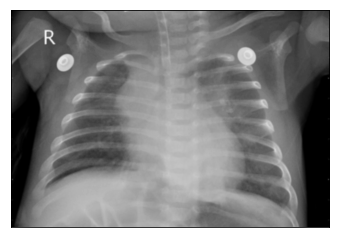

In [0]:
img = cv2.imread(train_data+'PNEUMONIA/'+ Pimages[1],0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')

plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [0]:
X_train1 = npzfile['arr_0']

In [0]:
import tensorflow as tf
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [0]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(100,100,3)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(100,100,3)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.00005),
                  metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 100, 100, 16)      2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 64)        18496     
__________

In [0]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[checkpoint] ,
          epochs=5,verbose=2)

Train on 5216 samples, validate on 624 samples
Epoch 1/5
 - 104s - loss: 0.5856 - acc: 0.7414 - val_loss: 0.6652 - val_acc: 0.6250

Epoch 00001: val_acc improved from -inf to 0.62500, saving model to weights.hdf5
Epoch 2/5
 - 102s - loss: 0.4827 - acc: 0.7633 - val_loss: 0.6839 - val_acc: 0.6362

Epoch 00002: val_acc improved from 0.62500 to 0.63622, saving model to weights.hdf5
Epoch 3/5
 - 101s - loss: 0.3531 - acc: 0.8484 - val_loss: 0.3940 - val_acc: 0.8325

Epoch 00003: val_acc improved from 0.63622 to 0.83253, saving model to weights.hdf5
Epoch 4/5
 - 101s - loss: 0.3032 - acc: 0.8698 - val_loss: 0.3398 - val_acc: 0.8622

Epoch 00004: val_acc improved from 0.83253 to 0.86218, saving model to weights.hdf5
Epoch 5/5
 - 102s - loss: 0.2688 - acc: 0.8919 - val_loss: 0.4305 - val_acc: 0.8237

Epoch 00005: val_acc did not improve from 0.86218


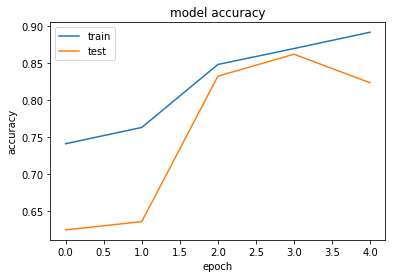

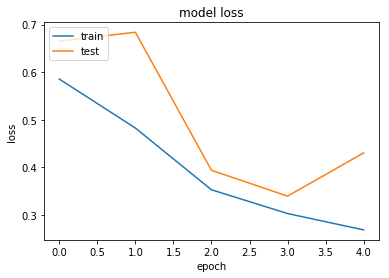

In [0]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)


In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, pred)

array([[134, 100],
       [ 11, 379]])

In [0]:
acc = (134+379)/(134+100+11+379)
print(acc)

0.8221153846153846
